In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from seminartools.models.utils import get_mse_by_country
from seminartools.data import read_merged
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.cov_bhm_model import CovBHMModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


# 1. Read data

In [3]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


country       date  inflation  gdp_growth  interest_rate  \
0             Japan 1977-01-01   0.022951    2.187257       6.333333   
1            Canada 1977-01-01   0.023904    1.533830       8.166667   
2     United States 1977-01-01   0.017231    1.186233       4.700000   
3             Japan 1977-04-01   0.027244    0.703788       5.000000   
4            Canada 1977-04-01   0.023346    0.510302       7.666667   
...             ...        ...        ...         ...            ...   
2166          Italy 2023-01-01   0.003938    0.552944       3.000000   
2167         Canada 2023-01-01   0.006080    0.610026       4.500000   
2168         Sweden 2023-01-01   0.014955    0.656897       2.833333   
2169          Korea 2023-01-01   0.010538    0.329875       3.500000   
2170   South Africa 2023-01-01   0.011202    0.406619       7.416667   

      unemployment_rate  commodity_CRUDE_PETRO  commodity_iNATGAS  \
0                   2.3                0.00000           0.052425   
1                   8.8                0.00000           0.052425   
2                   8.2                0.00000           0.052425   
3                   2.0               -0.00400           0.043586   
4                   8.0               -0.00400           0.043586   
...                 ...                    ...                ...   
2166                8.3               -0.02041          -0.585458   
2167                5.4               -0.02041          -0.585458   
2168                7.8               -0.02041          -0.585458   
2169                3.2               -0.02041          -0.585458   
2170               28.1               -0.02041          -0.585458   

      commodity_iAGRICULTURE  commodity_iMETMIN  commodity_iPRECIOUSMET  
0                   0.144757           0.041940                0.112740  
1                   0.144757           0.041940                0.112740  
2                   0.144757           0.041940                0.112740  
3                  -0.066688          -0.045412               -0.060029  
4                  -0.066688          -0.045412               -0.060029  
...                      ...                ...                     ...  
2166                0.002037           0.007418                0.043183  
2167                0.002037           0.007418                0.043183  
2168                0.002037           0.007418                0.043183  
2169                0.002037           0.007418                0.043183  
2170                0.002037           0.007418                0.043183  

[2171 rows x 11 columns]

In [4]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

# 2. Get stats (only top 5 models)

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001FDA1F9CAD0>)


100%|██████████| 20/20 [00:00<00:00, 121.93it/s]


Fitted!
Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x000001FDACC361D0>)


100%|██████████| 20/20 [00:00<00:00, 7861.13it/s]


Fitted!


c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast += exog_coefs[j] * exogData[i-1]
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\models\armax_model.py:211: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

Creating regression coefficients: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


Creating regression coefficients: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Creating regression coefficients: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


Creating regression coefficients: 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


Creating regression coefficients: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 144.26it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 237.77it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 123.24it/s]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 56.32it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:00<00:00, 123.13it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:00<00:00, 137.36it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:00<00:00, 91.62it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:00<00:00, 135.34it/s]


Creating regression coefficients: 100%|██████████| 9/9 [00:00<00:00, 157.78it/s]


Fitting model on the full dataset... (model=<seminartools.models.mucsvss_model.MUCSVSSModel object at 0x000001FDACD115D0>)
Fitted!


4qa        ar     uc_sv  pca_var_3  uc_sv_ss       arx  \
country                                                                       
Australia       0.000043  0.000047  0.000054   0.000053  0.000044  0.000050   
Belgium         0.000045  0.000049  0.000050   0.000050  0.000050  0.000066   
Canada          0.000046  0.000057  0.000044   0.000054  0.000033  0.000060   
Denmark         0.000033  0.000046  0.000036   0.000037  0.000025  0.000122   
France          0.000023  0.000028  0.000025   0.000020  0.000014  0.000076   
Germany         0.000028  0.000060  0.000038   0.000053  0.000032  0.000097   
Italy           0.000031  0.000043  0.000041   0.000053  0.000045  0.000059   
Japan           0.000024  0.000028  0.000024   0.000047  0.000028  0.000040   
Korea           0.000031  0.000036  0.000034   0.000049  0.000027  0.000060   
Netherlands     0.000060  0.000079  0.000065   0.000075  0.000055  0.000140   
New Zealand     0.000030  0.000029  0.000029   0.000057  0.000028  0.000041   
Norway          0.000054  0.000046  0.000054   0.000060  0.000054  0.002590   
Portugal        0.000091  0.000089  0.000099   0.000063  0.000040  0.000115   
South Africa    0.000069  0.000044  0.000048   0.000131  0.000039  0.000371   
Spain           0.000119  0.000081  0.000126   0.000109  0.000116  0.000120   
Sweden          0.000041  0.000053  0.000050   0.000054  0.000032  0.000258   
Switzerland     0.000026  0.000040  0.000038   0.000039  0.000031  0.001851   
Türkiye         0.000256  0.000312  0.000287   0.000336  0.000221  0.016005   
United Kingdom  0.000020  0.000024  0.000023   0.000016  0.000014  0.000158   
United States   0.000061  0.000066  0.000061   0.000062  0.000045  0.000071   

                    arma     armax  random_effects  random_effects_x  \
country                                                                
Australia       0.000042  0.005380        0.000053          0.000049   
Belgium         0.000072  0.002048        0.000043          0.000043   
Canada          0.000046  0.000261        0.000082          0.000071   
Denmark         0.000048  0.052415        0.000039          0.000044   
France          0.000071  0.000325        0.000027          0.000031   
Germany         0.000055  0.000243        0.000042          0.000043   
Italy           0.000044  0.000105        0.000037          0.000040   
Japan           0.000026  0.000098        0.000035          0.000029   
Korea           0.000082  0.005166        0.000033          0.000032   
Netherlands     0.000069  0.000474        0.000064          0.000065   
New Zealand     0.000028  0.000145        0.000032          0.000036   
Norway          0.000089  0.002988        0.000056          0.000058   
Portugal        0.000059  0.001281        0.000130          0.000141   
South Africa    0.000083  0.087764        0.000057          0.000058   
Spain           0.000062  0.000155        0.000242          0.000252   
Sweden          0.000042  0.007667        0.000068          0.000077   
Switzerland     0.000040  0.009206        0.000045          0.000037   
Türkiye         0.001538  0.414811        0.000296          0.000349   
United Kingdom  0.002996  0.002342        0.000024          0.000029   
United States   0.000050  0.000177        0.000102          0.000089   

                distance  distance_x   cov_bhm  cov_bhm_x   mucsvss  
country                                                              
Australia       0.000053    0.000052  0.000053   0.000052  0.000052  
Belgium         0.000045    0.000055  0.000042   0.000051  0.000046  
Canada          0.000083    0.000072  0.000083   0.000072  0.000208  
Denmark         0.000039    0.000055  0.000040   0.000056  0.000043  
France          0.000027    0.000056  0.000027   0.000076  0.000036  
Germany         0.000041    0.000046  0.000043   0.000053  0.000052  
Italy           0.000036    0.000045  0.000036   0.000043  0.000397  
Japan           0.000034    0.000031  0.000035   0.000032  0.000028

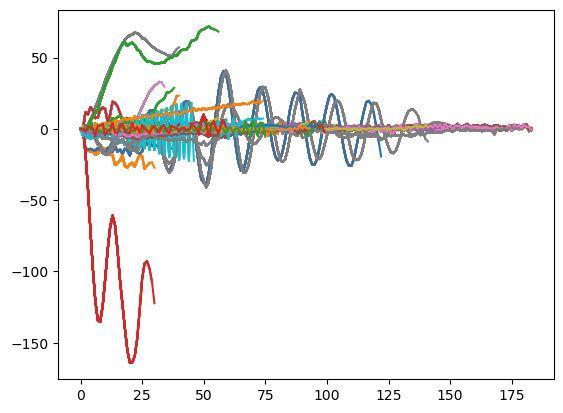

In [5]:
from seminartools.models.utils import get_mse_by_country
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]
stats = get_mse_by_country(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        ("pca_var_3", lambda: PCAVARModel()),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
           (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
      
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        ("cov_bhm", lambda: CovBHMModel()),
        ("cov_bhm_x", lambda: CovBHMModel(exogenous_columns=exog_columns)),
        ("mucsvss", lambda: muc_model),
        
     
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

# 3. Plot the Data

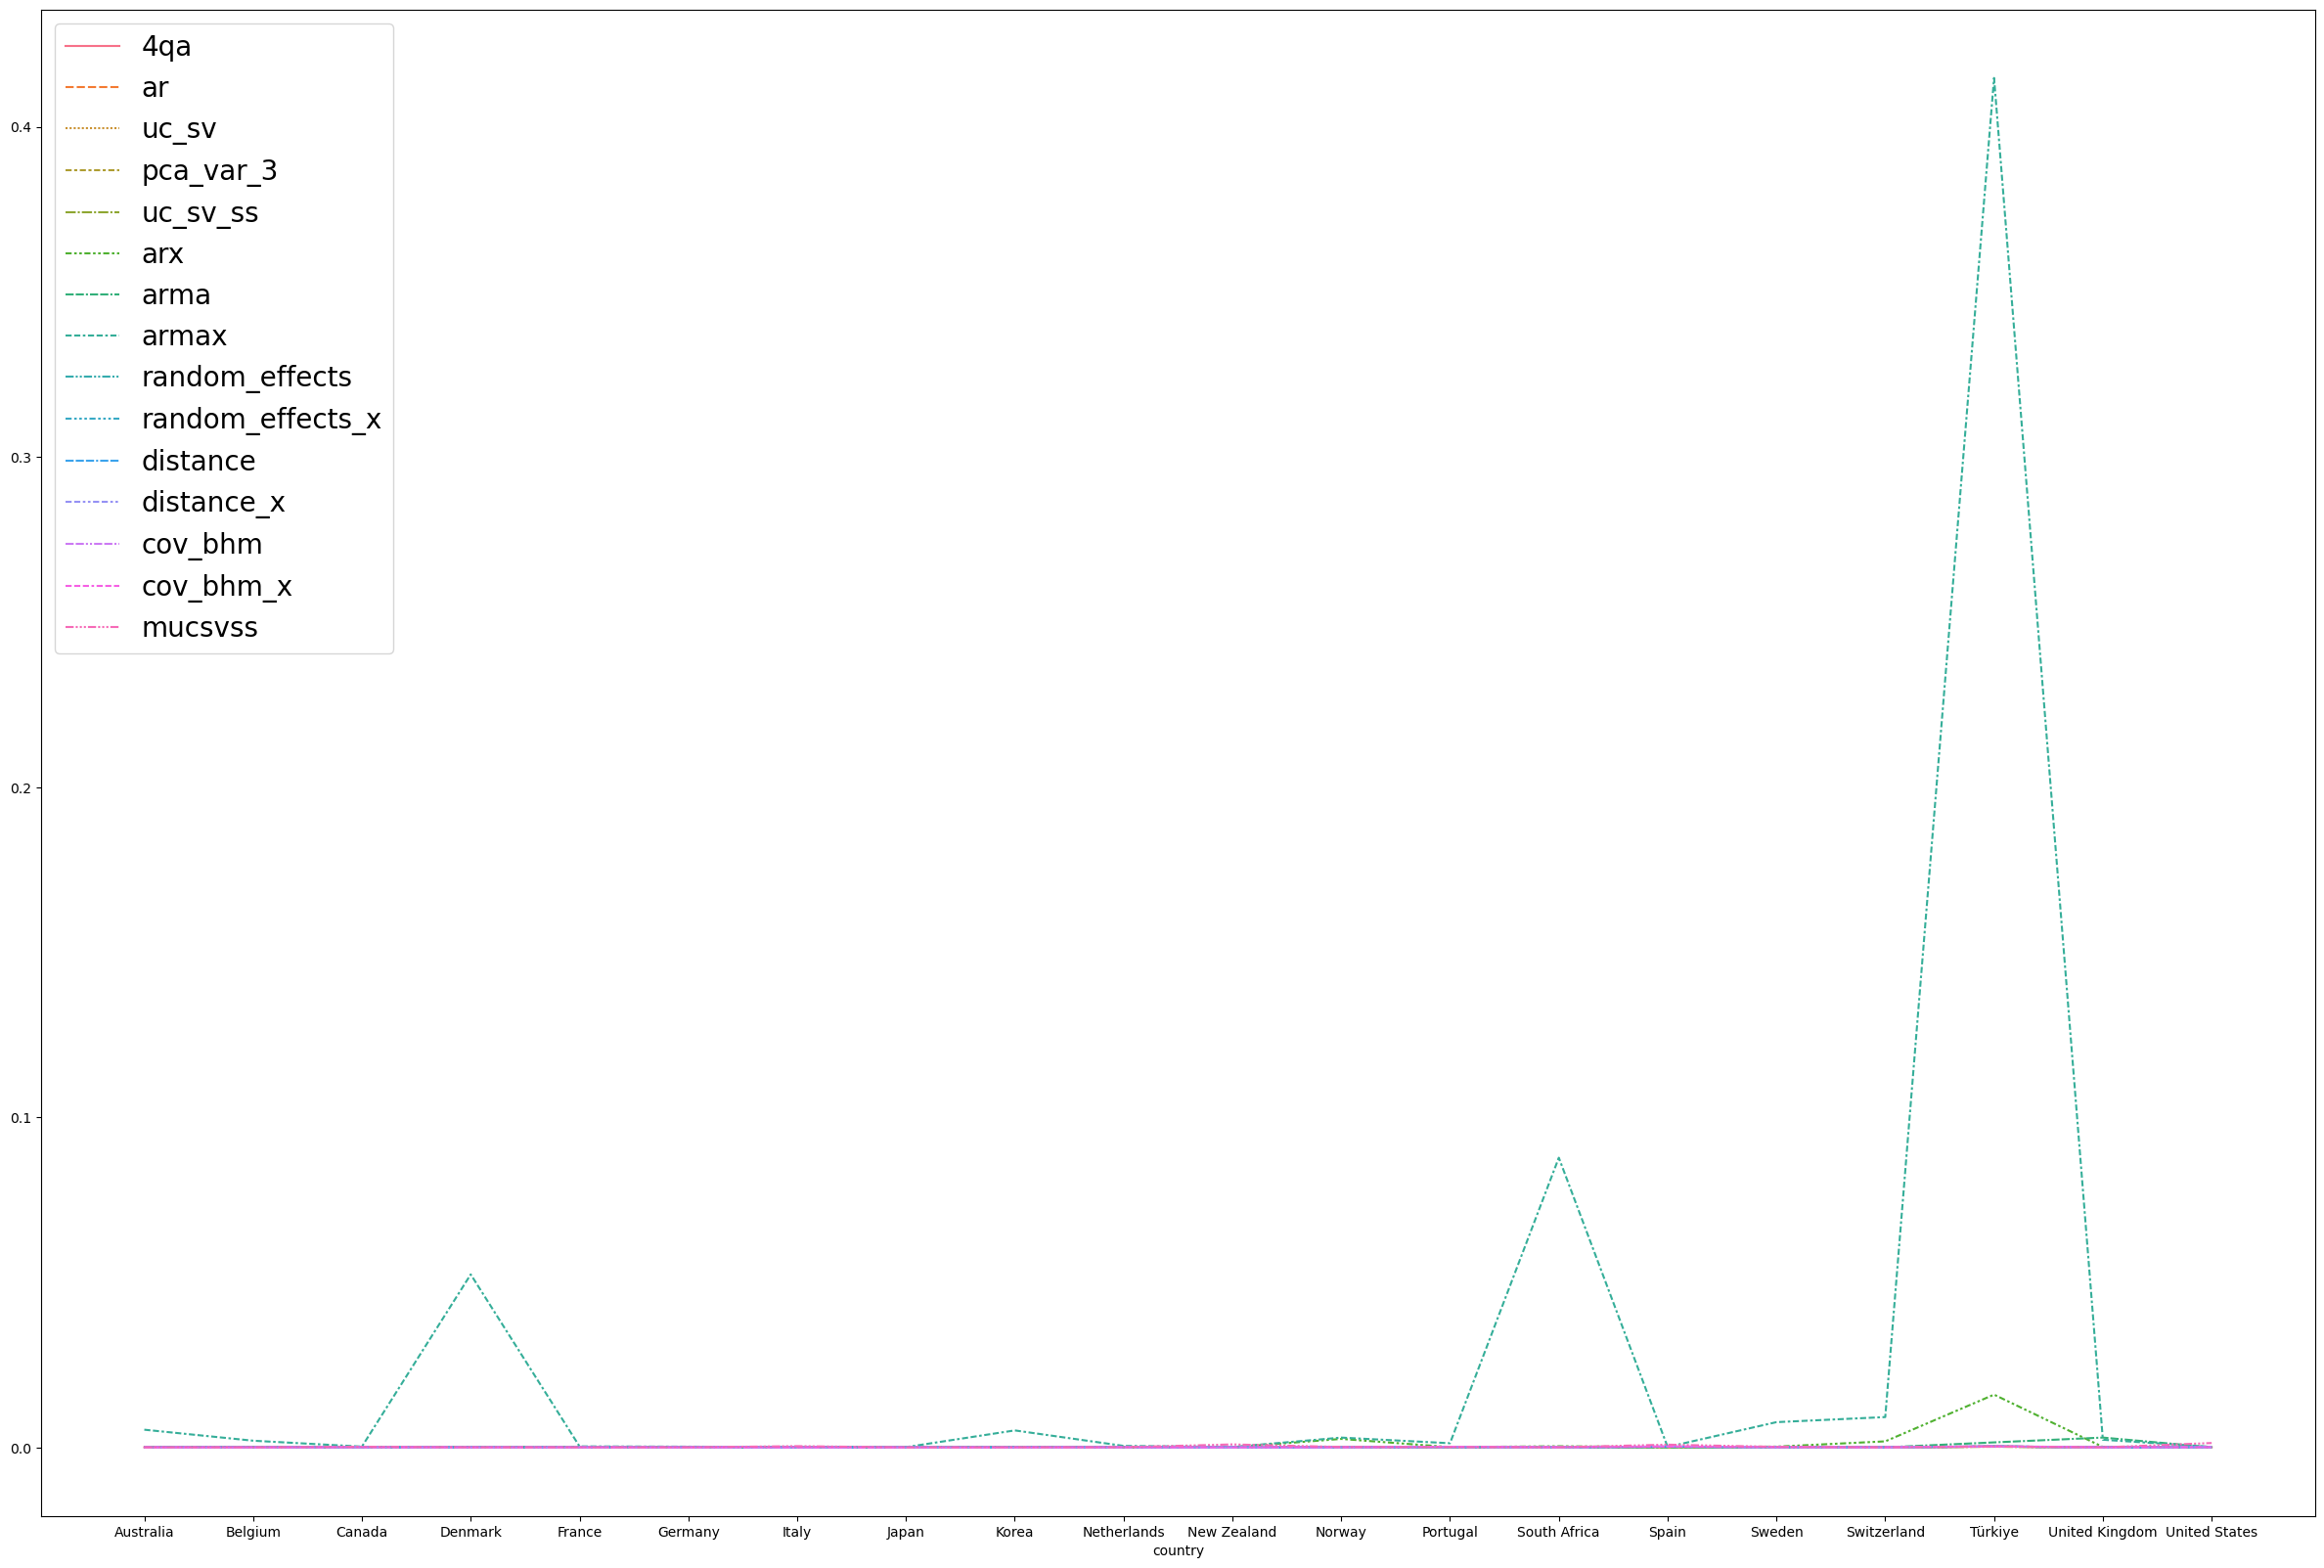

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats
)
plt.legend(loc = 'upper left', fontsize = "20")


In [6]:
stats

4qa        ar     uc_sv  pca_var_3  uc_sv_ss       arx  \
country                                                                       
Australia       0.000043  0.000047  0.000054   0.000053  0.000044  0.000050   
Belgium         0.000045  0.000049  0.000050   0.000050  0.000050  0.000066   
Canada          0.000046  0.000057  0.000044   0.000054  0.000033  0.000060   
Denmark         0.000033  0.000046  0.000036   0.000037  0.000025  0.000122   
France          0.000023  0.000028  0.000025   0.000020  0.000014  0.000076   
Germany         0.000028  0.000060  0.000038   0.000053  0.000032  0.000097   
Italy           0.000031  0.000043  0.000041   0.000053  0.000045  0.000059   
Japan           0.000024  0.000028  0.000024   0.000047  0.000028  0.000040   
Korea           0.000031  0.000036  0.000034   0.000049  0.000027  0.000060   
Netherlands     0.000060  0.000079  0.000065   0.000075  0.000055  0.000140   
New Zealand     0.000030  0.000029  0.000029   0.000057  0.000028  0.000041   
Norway          0.000054  0.000046  0.000054   0.000060  0.000054  0.002590   
Portugal        0.000091  0.000089  0.000099   0.000063  0.000040  0.000115   
South Africa    0.000069  0.000044  0.000048   0.000131  0.000039  0.000371   
Spain           0.000119  0.000081  0.000126   0.000109  0.000116  0.000120   
Sweden          0.000041  0.000053  0.000050   0.000054  0.000032  0.000258   
Switzerland     0.000026  0.000040  0.000038   0.000039  0.000031  0.001851   
Türkiye         0.000256  0.000312  0.000287   0.000336  0.000221  0.016005   
United Kingdom  0.000020  0.000024  0.000023   0.000016  0.000014  0.000158   
United States   0.000061  0.000066  0.000061   0.000062  0.000045  0.000071   

                    arma     armax  random_effects  random_effects_x  \
country                                                                
Australia       0.000042  0.005380        0.000053          0.000049   
Belgium         0.000072  0.002048        0.000043          0.000043   
Canada          0.000046  0.000261        0.000082          0.000071   
Denmark         0.000048  0.052415        0.000039          0.000044   
France          0.000071  0.000325        0.000027          0.000031   
Germany         0.000055  0.000243        0.000042          0.000043   
Italy           0.000044  0.000105        0.000037          0.000040   
Japan           0.000026  0.000098        0.000035          0.000029   
Korea           0.000082  0.005166        0.000033          0.000032   
Netherlands     0.000069  0.000474        0.000064          0.000065   
New Zealand     0.000028  0.000145        0.000032          0.000036   
Norway          0.000089  0.002988        0.000056          0.000058   
Portugal        0.000059  0.001281        0.000130          0.000141   
South Africa    0.000083  0.087764        0.000057          0.000058   
Spain           0.000062  0.000155        0.000242          0.000252   
Sweden          0.000042  0.007667        0.000068          0.000077   
Switzerland     0.000040  0.009206        0.000045          0.000037   
Türkiye         0.001538  0.414811        0.000296          0.000349   
United Kingdom  0.002996  0.002342        0.000024          0.000029   
United States   0.000050  0.000177        0.000102          0.000089   

                distance  distance_x   cov_bhm  cov_bhm_x   mucsvss  
country                                                              
Australia       0.000053    0.000052  0.000053   0.000052  0.000052  
Belgium         0.000045    0.000055  0.000042   0.000051  0.000046  
Canada          0.000083    0.000072  0.000083   0.000072  0.000208  
Denmark         0.000039    0.000055  0.000040   0.000056  0.000043  
France          0.000027    0.000056  0.000027   0.000076  0.000036  
Germany         0.000041    0.000046  0.000043   0.000053  0.000052  
Italy           0.000036    0.000045  0.000036   0.000043  0.000397  
Japan           0.000034    0.000031  0.000035   0.000032  0.000028

In [7]:
#Run this if you want relative mspes!!
stats_rescaled = stats.div(stats['uc_sv'], axis = 'index' )
stats_rescaled

4qa        ar  uc_sv  pca_var_3  uc_sv_ss        arx  \
country                                                                     
Australia       0.795303  0.864138    1.0   0.980254  0.807748   0.931864   
Belgium         0.892847  0.986129    1.0   0.997925  0.996248   1.315955   
Canada          1.049748  1.287686    1.0   1.214464  0.754307   1.356468   
Denmark         0.897734  1.257186    1.0   1.021576  0.676771   3.372642   
France          0.904580  1.116387    1.0   0.813224  0.576064   3.053093   
Germany         0.721569  1.564570    1.0   1.387804  0.836376   2.534153   
Italy           0.747166  1.041685    1.0   1.296211  1.087576   1.444971   
Japan           0.997905  1.170826    1.0   1.941469  1.168905   1.659929   
Korea           0.930056  1.082539    1.0   1.470934  0.820042   1.803891   
Netherlands     0.930190  1.220071    1.0   1.149690  0.843726   2.150216   
New Zealand     1.028879  1.005897    1.0   1.949858  0.971986   1.395004   
Norway          1.004241  0.856197    1.0   1.107691  1.009939  48.064486   
Portugal        0.912878  0.894316    1.0   0.636345  0.404399   1.157035   
South Africa    1.439764  0.913218    1.0   2.724299  0.802332   7.716416   
Spain           0.946979  0.641536    1.0   0.866016  0.916534   0.954039   
Sweden          0.810120  1.054715    1.0   1.078212  0.634574   5.118333   
Switzerland     0.673351  1.056253    1.0   1.032892  0.825383  48.726765   
Türkiye         0.891504  1.087354    1.0   1.167822  0.770428  55.692893   
United Kingdom  0.871592  1.046075    1.0   0.723717  0.632293   6.987175   
United States   1.008215  1.082981    1.0   1.022253  0.748331   1.171490   

                      arma        armax  random_effects  random_effects_x  \
country                                                                     
Australia         0.778018    99.532887        0.977168          0.897566   
Belgium           1.440667    40.911130        0.861703          0.855346   
Canada            1.044466     5.890888        1.857207          1.610962   
Denmark           1.320130  1444.270372        1.084818          1.200542   
France            2.828824    13.022451        1.101669          1.242761   
Germany           1.444850     6.341833        1.096921          1.120442   
Italy             1.080217     2.553345        0.897870          0.965883   
Japan             1.071220     4.074434        1.452968          1.185663   
Korea             2.455023   154.195930        0.999083          0.953124   
Netherlands       1.066060     7.297736        0.988238          1.000766   
New Zealand       0.971150     4.950026        1.100959          1.222824   
Norway            1.649851    55.452795        1.047311          1.076048   
Portugal          0.592752    12.906468        1.313037          1.422219   
South Africa      1.718330  1826.201268        1.177669          1.205645   
Spain             0.494918     1.224925        1.917497          1.995704   
Sweden            0.836048   152.008553        1.354402          1.534595   
Switzerland       1.057126   242.326838        1.188536          0.973298   
Türkiye           5.353106  1443.391620        1.029155          1.212758   
United Kingdom  132.292610   103.402145        1.045795          1.283261   
United States     0.819447     2.920693        1.685151          1.462088   

                distance  distance_x   cov_bhm  cov_bhm_x    mucsvss  
country                                                               
Australia       0.986131    0.954083  0.986326   0.955777   0.965579  
Belgium         0.903054    1.091780  0.838458   1.012321   0.914175  
Canada          1.883740    1.638235  1.881309   1.632034   4.708565  
Denmark         1.082702    1.515263  1.098147   1.554224   1.191997  
France          1.092313    2.264556  1.076644   3.038824   1.457032  
Germany         1.080793    1.205565  1.117049   1.395511   1.351862  
Italy           0.887659    1.091423  0.879643   1.050946   9.6

In [8]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    stats_rescaled.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Country-specific relative MSPE per model, out-of-sample, 2000-2023",
        label="tab:model_eval_country_spec",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Country-specific relative MSPE per model, out-of-sample, 2000-2023}
\label{tab:model_eval_country_spec}
\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
 & 4qa & ar & uc\_sv & pca\_var\_3 & uc\_sv\_ss & arx & arma & armax & random\_effects & random\_effects\_x & distance & distance\_x & cov\_bhm & cov\_bhm\_x & mucsvss \\
country &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 0.7953 & 0.8641 & 1.0000 & 0.9803 & 0.8077 & 0.9319 & 0.7780 & 99.5329 & 0.9772 & 0.8976 & 0.9861 & 0.9541 & 0.9863 & 0.9558 & 0.9656 \\
Belgium & 0.8928 & 0.9861 & 1.0000 & 0.9979 & 0.9962 & 1.3160 & 1.4407 & 40.9111 & 0.8617 & 0.8553 & 0.9031 & 1.0918 & 0.8385 & 1.0123 & 0.9142 \\
Canada & 1.0497 & 1.2877 & 1.0000 & 1.2145 & 0.7543 & 1.3565 & 1.0445 & 5.8909 & 1.8572 & 1.6110 & 1.8837 & 1.6382 & 1.8813 & 1.6320 & 4.7086 \\
Denmark & 0.8977 & 1.2572 & 1.0000 & 1.0216 & 0.6768 & 3.3726 & 1.3201 & 1444.2704 & 1.0848 & 1.2005 & 1.0827 & 1.5153 & 1.0981 & 1.5542 & 1.1920 \\
Fran

C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\1199517908.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\1199517908.py:14: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\1199517908.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country, y = country, x = 

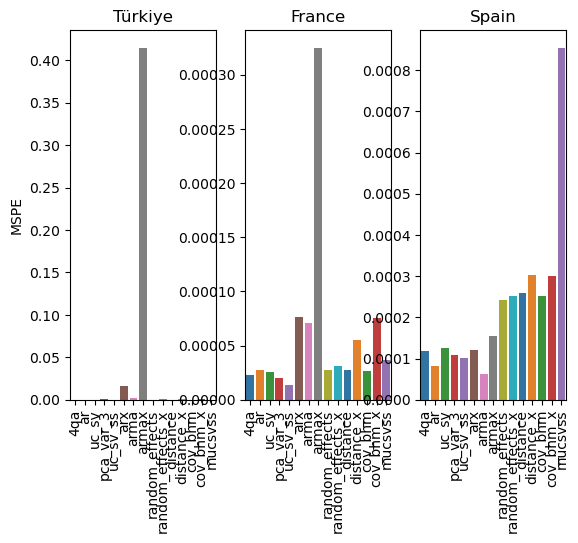

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ["Türkiye", "France", "Spain"] #one where ARMA is bad, one where all similar, one where MUCSVSS is bad
# countries = (df["country"].unique())

fig, axes = plt.subplots(1, 3, sharex=True)

    
for index, country in enumerate(countries):
    stats_country = stats.loc[country]
    stats_country = stats_country.reset_index()
    stats_country
    sns.barplot(ax= axes[index],data = stats_country, y = country, x = "index", palette = sns.color_palette("tab10"))
    
    # axes[index].set_title(country)
    axes[index].tick_params(axis='x', rotation= 90)  # Rotate x-axis labels for each subplot individually
    axes[index].set_xlabel("")
    axes[index].set_title(country)

    if index == 0:
        axes[index].set_ylabel("MSPE")
    else:
        axes[index].set_ylabel("")  # Set empty string for y-label


# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Remove ARX and ARMAX from the plot, because of their bad performance

In [44]:
stats

4qa        ar     uc_sv  pca_var_3  uc_sv_ss       arx  \
country                                                                       
Australia       0.000043  0.000047  0.000055   0.000053  0.000049  0.000050   
Belgium         0.000045  0.000049  0.000050   0.000050  0.000052  0.000066   
Canada          0.000046  0.000057  0.000044   0.000054  0.000034  0.000060   
Denmark         0.000033  0.000046  0.000033   0.000037  0.000023  0.000122   
France          0.000023  0.000028  0.000025   0.000020  0.000013  0.000076   
Germany         0.000028  0.000060  0.000037   0.000053  0.000032  0.000097   
Italy           0.000031  0.000043  0.000039   0.000053  0.000041  0.000059   
Japan           0.000024  0.000028  0.000024   0.000047  0.000027  0.000040   
Korea           0.000031  0.000036  0.000034   0.000049  0.000029  0.000060   
Netherlands     0.000060  0.000079  0.000067   0.000075  0.000049  0.000140   
New Zealand     0.000030  0.000029  0.000030   0.000057  0.000028  0.000041   
Norway          0.000054  0.000046  0.000054   0.000060  0.000051  0.002590   
Portugal        0.000091  0.000089  0.000099   0.000063  0.000046  0.000115   
South Africa    0.000069  0.000044  0.000048   0.000131  0.000036  0.000371   
Spain           0.000119  0.000081  0.000126   0.000109  0.000102  0.000120   
Sweden          0.000041  0.000053  0.000053   0.000054  0.000031  0.000258   
Switzerland     0.000026  0.000040  0.000037   0.000039  0.000032  0.001851   
Türkiye         0.000256  0.000312  0.000280   0.000336  0.000219  0.016005   
United Kingdom  0.000020  0.000024  0.000023   0.000016  0.000013  0.000158   
United States   0.000061  0.000066  0.000061   0.000062  0.000048  0.000071   

                    arma     armax  random_effects  random_effects_x  \
country                                                                
Australia       0.000042  0.005380        0.000053          0.000049   
Belgium         0.000072  0.002048        0.000043          0.000043   
Canada          0.000046  0.000261        0.000082          0.000071   
Denmark         0.000048  0.052415        0.000039          0.000043   
France          0.000071  0.000325        0.000027          0.000031   
Germany         0.000055  0.000243        0.000042          0.000043   
Italy           0.000044  0.000105        0.000037          0.000040   
Japan           0.000026  0.000098        0.000035          0.000029   
Korea           0.000082  0.005166        0.000034          0.000032   
Netherlands     0.000069  0.000474        0.000064          0.000065   
New Zealand     0.000028  0.000145        0.000032          0.000036   
Norway          0.000089  0.002988        0.000056          0.000058   
Portugal        0.000059  0.001281        0.000130          0.000141   
South Africa    0.000083  0.087764        0.000057          0.000057   
Spain           0.000062  0.000155        0.000242          0.000252   
Sweden          0.000042  0.007667        0.000068          0.000077   
Switzerland     0.000040  0.009206        0.000045          0.000037   
Türkiye         0.001538  0.414811        0.000295          0.000351   
United Kingdom  0.002996  0.002342        0.000024          0.000029   
United States   0.000050  0.000177        0.000102          0.000089   

                distance  distance_x   cov_bhm  cov_bhm_x   mucsvss  
country                                                              
Australia       0.000053    0.000052  0.000053   0.000052  0.000052  
Belgium         0.000045    0.000054  0.000042   0.000050  0.000046  
Canada          0.000083    0.000072  0.000083   0.000072  0.000208  
Denmark         0.000039    0.000055  0.000040   0.000057  0.000043  
France          0.000027    0.000055  0.000027   0.000075  0.000036  
Germany         0.000041    0.000046  0.000043   0.000054  0.000052  
Italy           0.000036    0.000045  0.000036   0.000043  0.000397  
Japan           0.000034    0.000031  0.000035   0.000032  0.000028

C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\460628389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\460628389.py:8: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
C:\Users\vandi\AppData\Local\Temp\ipykernel_28096\460628389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax= axes[index],data = stats_country_plot, y = coun

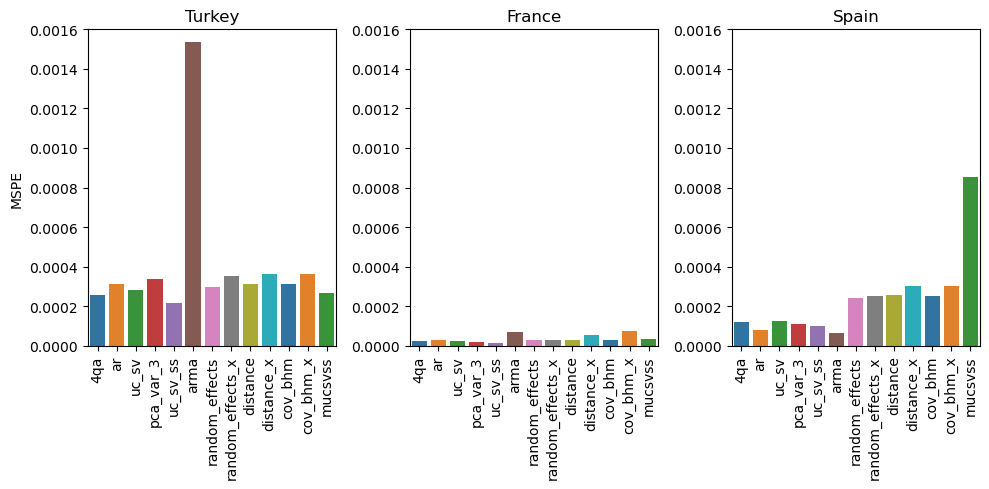

In [45]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize = (10,5))
stats_plot = stats.drop(columns = ["arx", "armax"])
    
for index, country in enumerate(countries):
    stats_country_plot = stats_plot.loc[country]
    stats_country_plot = stats_country_plot.reset_index()
    stats_country_plot
    sns.barplot(ax= axes[index],data = stats_country_plot, y = country, x = "index", palette = sns.color_palette("tab10"))
    
    # axes[index].set_title(country)
    axes[index].tick_params(axis='x', rotation= 90)  # Rotate x-axis labels for each subplot individually
    axes[index].set_xlabel("")
    if country == "Türkiye":
        country = "Turkey"
    axes[index].set_title(country)
    #have same y_axis in every figure
    axes[index].set_ylim(0,0.0016)
    if index == 0:
        axes[index].set_ylabel("MSPE")
    else:
        axes[index].set_ylabel("")  # Set empty string for y-label


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 4. Play around with sets of exogenous variables for VARX

In [39]:
from seminartools.models.utils import get_mse_by_country
from seminartools.data import read_merged

In [40]:
df = read_merged().reset_index()
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


country       date  inflation  gdp_growth  interest_rate  \
0             Japan 1977-01-01   0.022951    2.187257       6.333333   
1            Canada 1977-01-01   0.023904    1.533830       8.166667   
2     United States 1977-01-01   0.017231    1.186233       4.700000   
3             Japan 1977-04-01   0.027244    0.703788       5.000000   
4            Canada 1977-04-01   0.023346    0.510302       7.666667   
...             ...        ...        ...         ...            ...   
2166          Italy 2023-01-01   0.003938    0.552944       3.000000   
2167         Canada 2023-01-01   0.006080    0.610026       4.500000   
2168         Sweden 2023-01-01   0.014955    0.656897       2.833333   
2169          Korea 2023-01-01   0.010538    0.329875       3.500000   
2170   South Africa 2023-01-01   0.011202    0.406619       7.416667   

      unemployment_rate  commodity_CRUDE_PETRO  commodity_iNATGAS  \
0                   2.3                0.00000           0.052425   
1                   8.8                0.00000           0.052425   
2                   8.2                0.00000           0.052425   
3                   2.0               -0.00400           0.043586   
4                   8.0               -0.00400           0.043586   
...                 ...                    ...                ...   
2166                8.3               -0.02041          -0.585458   
2167                5.4               -0.02041          -0.585458   
2168                7.8               -0.02041          -0.585458   
2169                3.2               -0.02041          -0.585458   
2170               28.1               -0.02041          -0.585458   

      commodity_iAGRICULTURE  commodity_iMETMIN  commodity_iPRECIOUSMET  
0                   0.144757           0.041940                0.112740  
1                   0.144757           0.041940                0.112740  
2                   0.144757           0.041940                0.112740  
3                  -0.066688          -0.045412               -0.060029  
4                  -0.066688          -0.045412               -0.060029  
...                      ...                ...                     ...  
2166                0.002037           0.007418                0.043183  
2167                0.002037           0.007418                0.043183  
2168                0.002037           0.007418                0.043183  
2169                0.002037           0.007418                0.043183  
2170                0.002037           0.007418                0.043183  

[2171 rows x 11 columns]

c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inverti

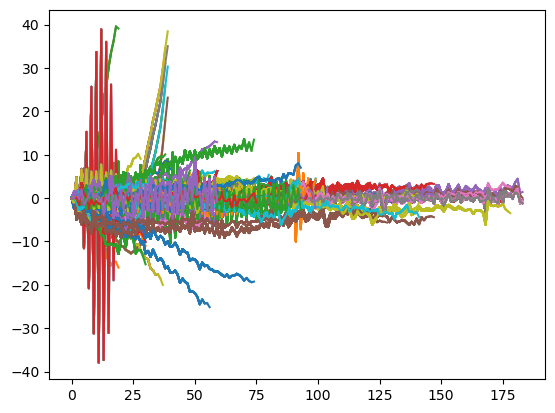

In [41]:
from seminartools.models.armax_model import ARMAXModel
stats = get_mse_by_country(
    [
        
        ("nothing", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "gdp_growth",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=["gdp_growth"]),
        ),
        (
            "interest_rate",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["interest_rate"]),
        ),
        (
            "commo",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["commodity_CRUDE_PETRO"]),
        ),
        (
            "unem",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= ["unemployment_rate"]),
        ),
        
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)

In [42]:
stats

nothing  gdp_growth  interest_rate     commo      unem
country                                                                
Australia       0.004289    0.004249       0.011517  0.004234  0.037161
Belgium         0.007357    0.008083       0.107039  0.009393  0.005962
Canada          0.004714    0.004926       0.030422  0.004537  0.004845
Denmark         0.004887    0.035397       0.174788  0.007191  0.005169
France          0.007198    0.013605       0.008887  0.004844  0.017496
Germany         0.005645    0.005871       0.006890  0.010243  0.005966
Italy           0.004516    0.006055       0.029788  0.005102  0.005227
Japan           0.002632    0.002767       0.056030  0.002919  0.112457
Korea           0.008390    0.023647       0.014030  0.028156  0.231367
Netherlands     0.007059    0.007867       0.341624  0.021858  0.010709
New Zealand     0.002893    0.003368       0.004132  0.002680  0.044689
Norway          0.009067    0.012566       0.066106  0.010069  1.373151
Portugal        0.006001    0.008191       0.006625  0.033062  0.006819
South Africa    0.008423    0.093477       0.701753  0.157485  0.010092
Spain           0.006370    0.034632       0.006204  0.006610  0.007133
Sweden          0.004301    0.088402       0.036299  0.012616  0.004857
Switzerland     0.004096    0.028652       0.083371  0.003276  0.012171
Türkiye         0.156918    0.167006       0.296357  0.158928  0.173994
United Kingdom  0.305610    0.016884       0.637039  0.816972  0.428412
United States   0.005078    0.005727       0.013684  0.004722  0.005425

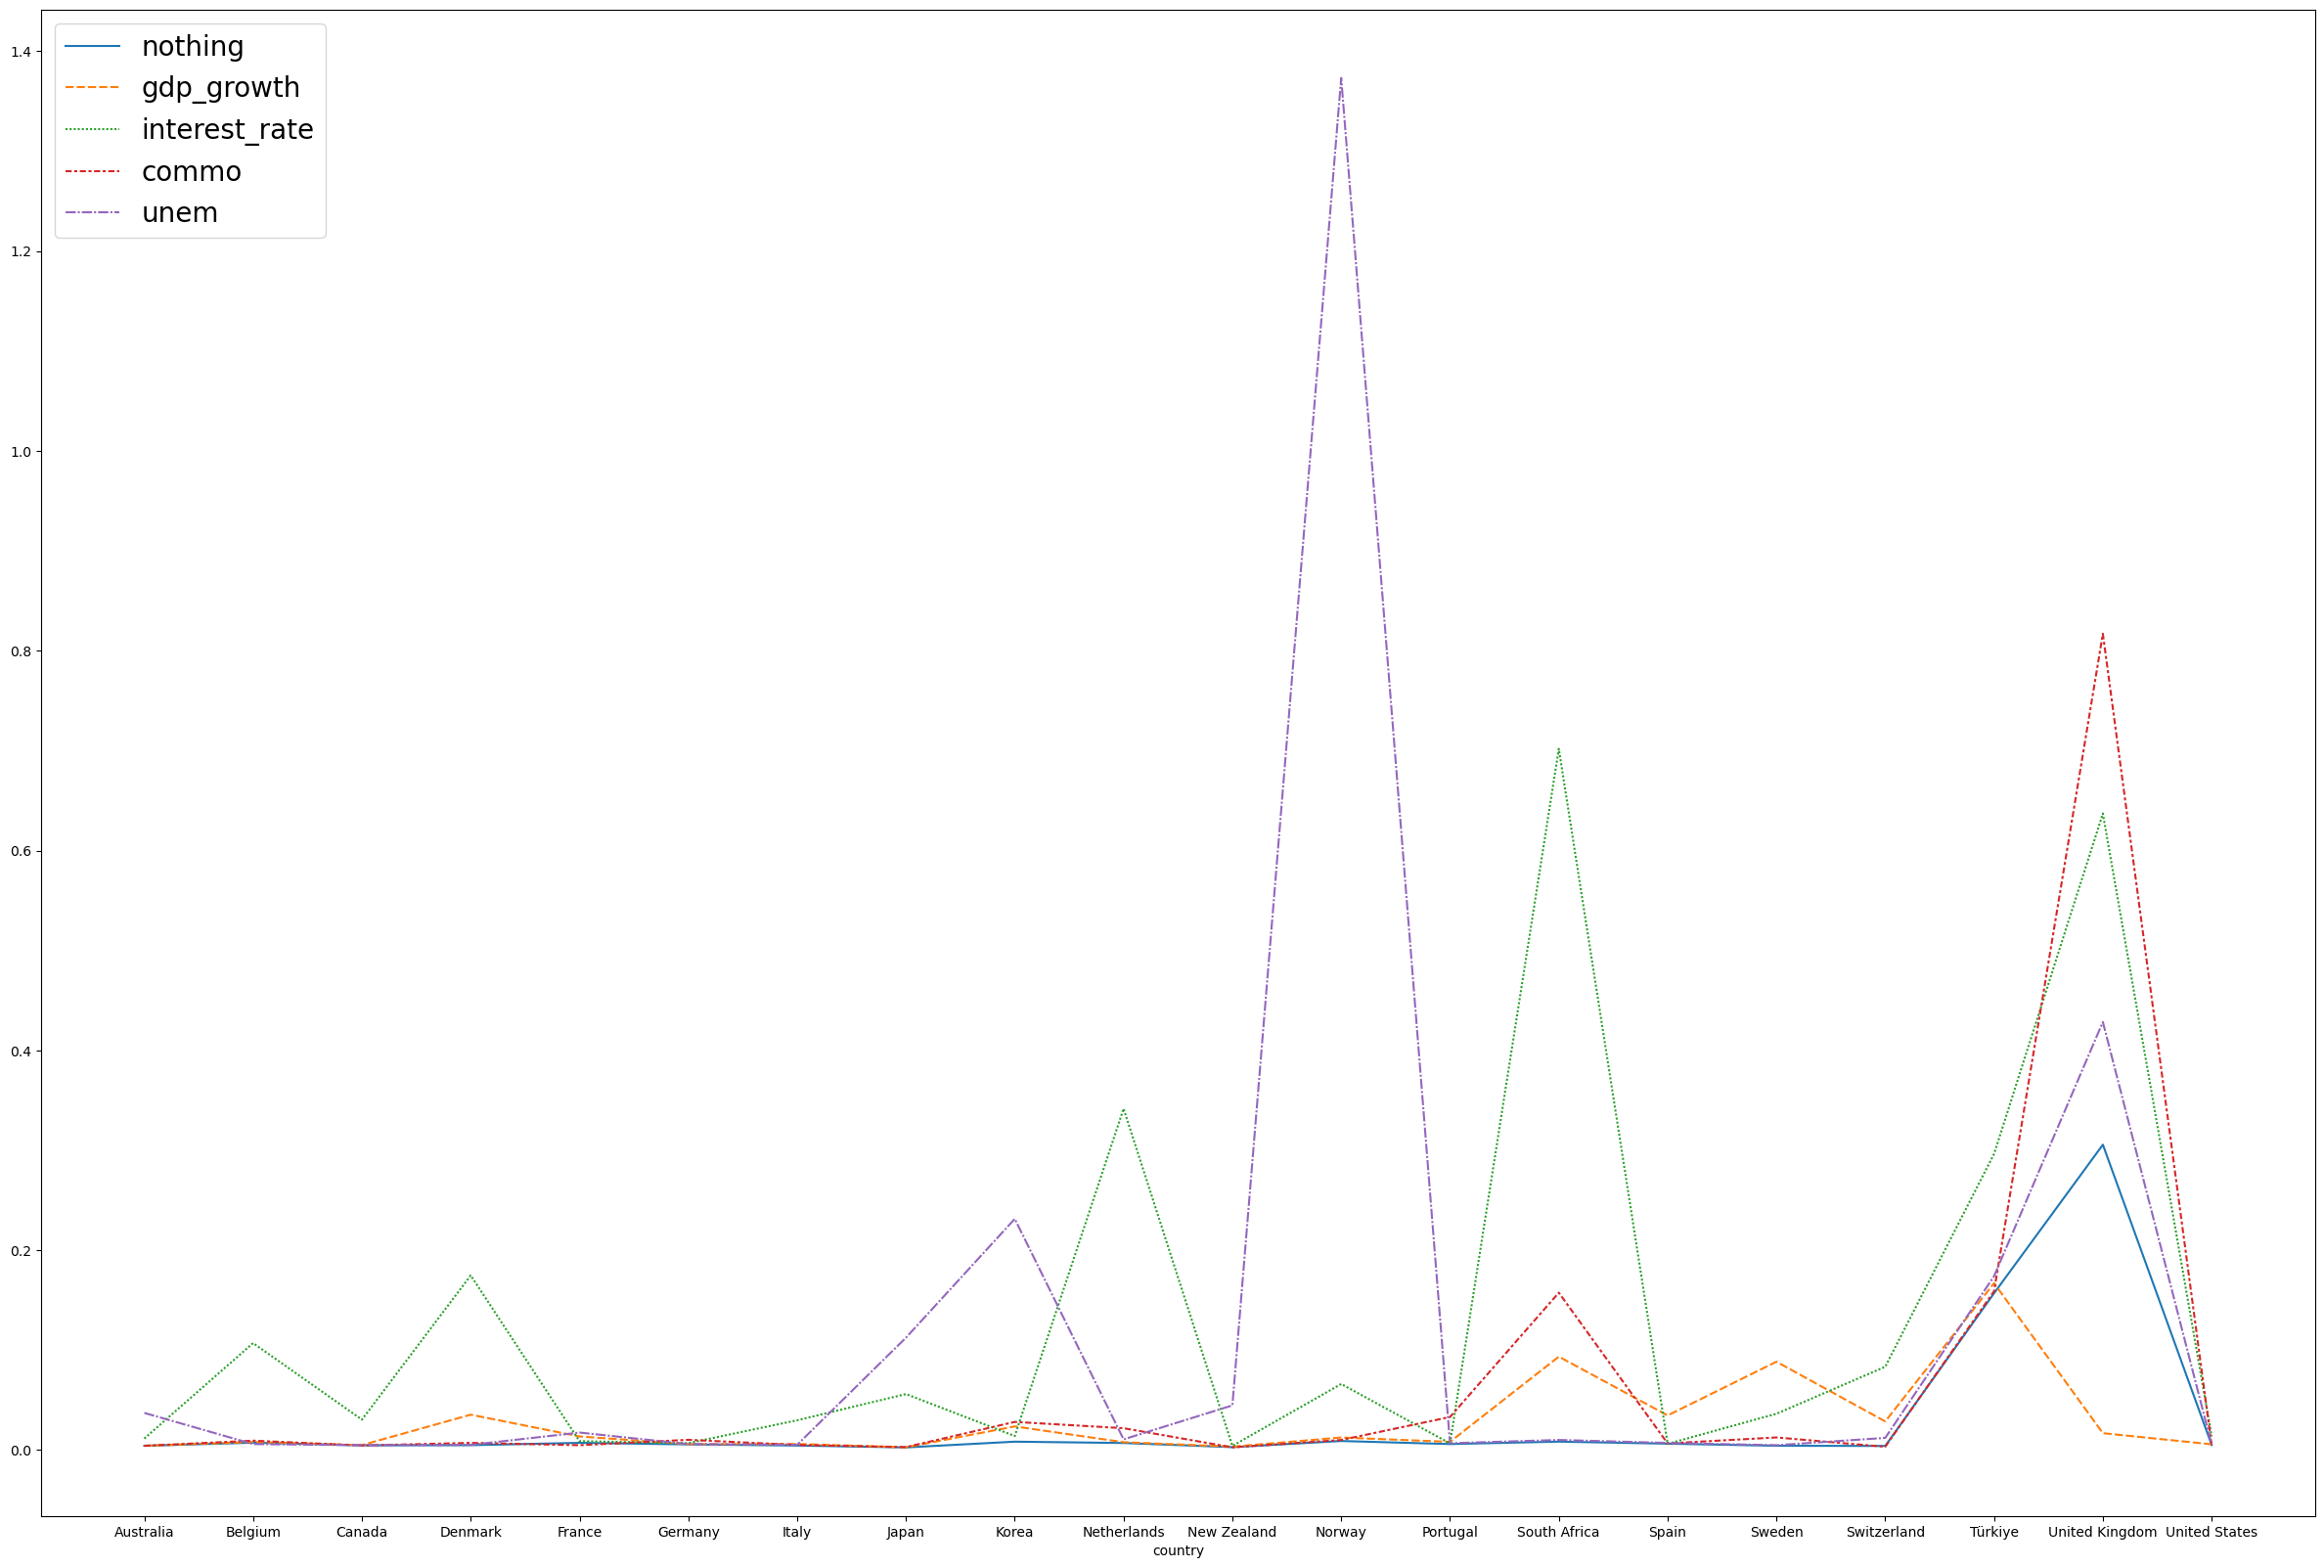

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
#data=stats.drop(["Norway", "United Kingdom"], axis=0)
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats
)
plt.legend(loc = 'upper left', fontsize = "20")

Note that unemployment performance especially bad for norway, interest rates for south africa, and everything apart from gdp growth performs poorly for the UK. However, if you remove those from the sample, 'nothing' still performs best

In [44]:
data = stats.drop(["Norway", "United Kingdom", "South Africa"], axis=0)
print(stats.mean())
print(data.mean())


nothing          0.028272
gdp_growth       0.028569
interest_rate    0.131629
commo            0.065245
unem             0.125155
dtype: float64
nothing          0.014256
gdp_growth       0.026379
interest_rate    0.072217
commo            0.018845
unem             0.040673
dtype: float64


c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vandi\Ap

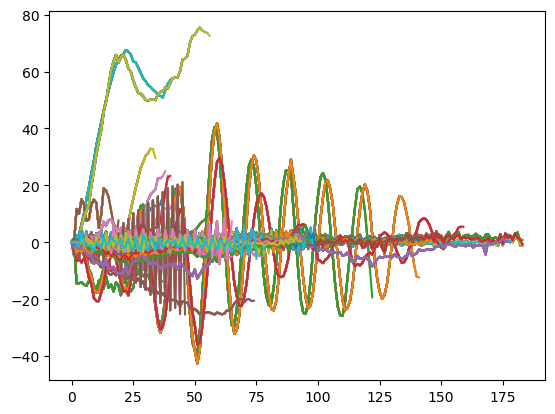

In [45]:
from seminartools.models.armax_model import ARMAXModel
df = read_merged(remove_countries= ["Türkiye"]).reset_index()

exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats2 = get_mse_by_country(
    [
        
        ("nothing", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "all",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns= exog_columns),
        ),
        
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)

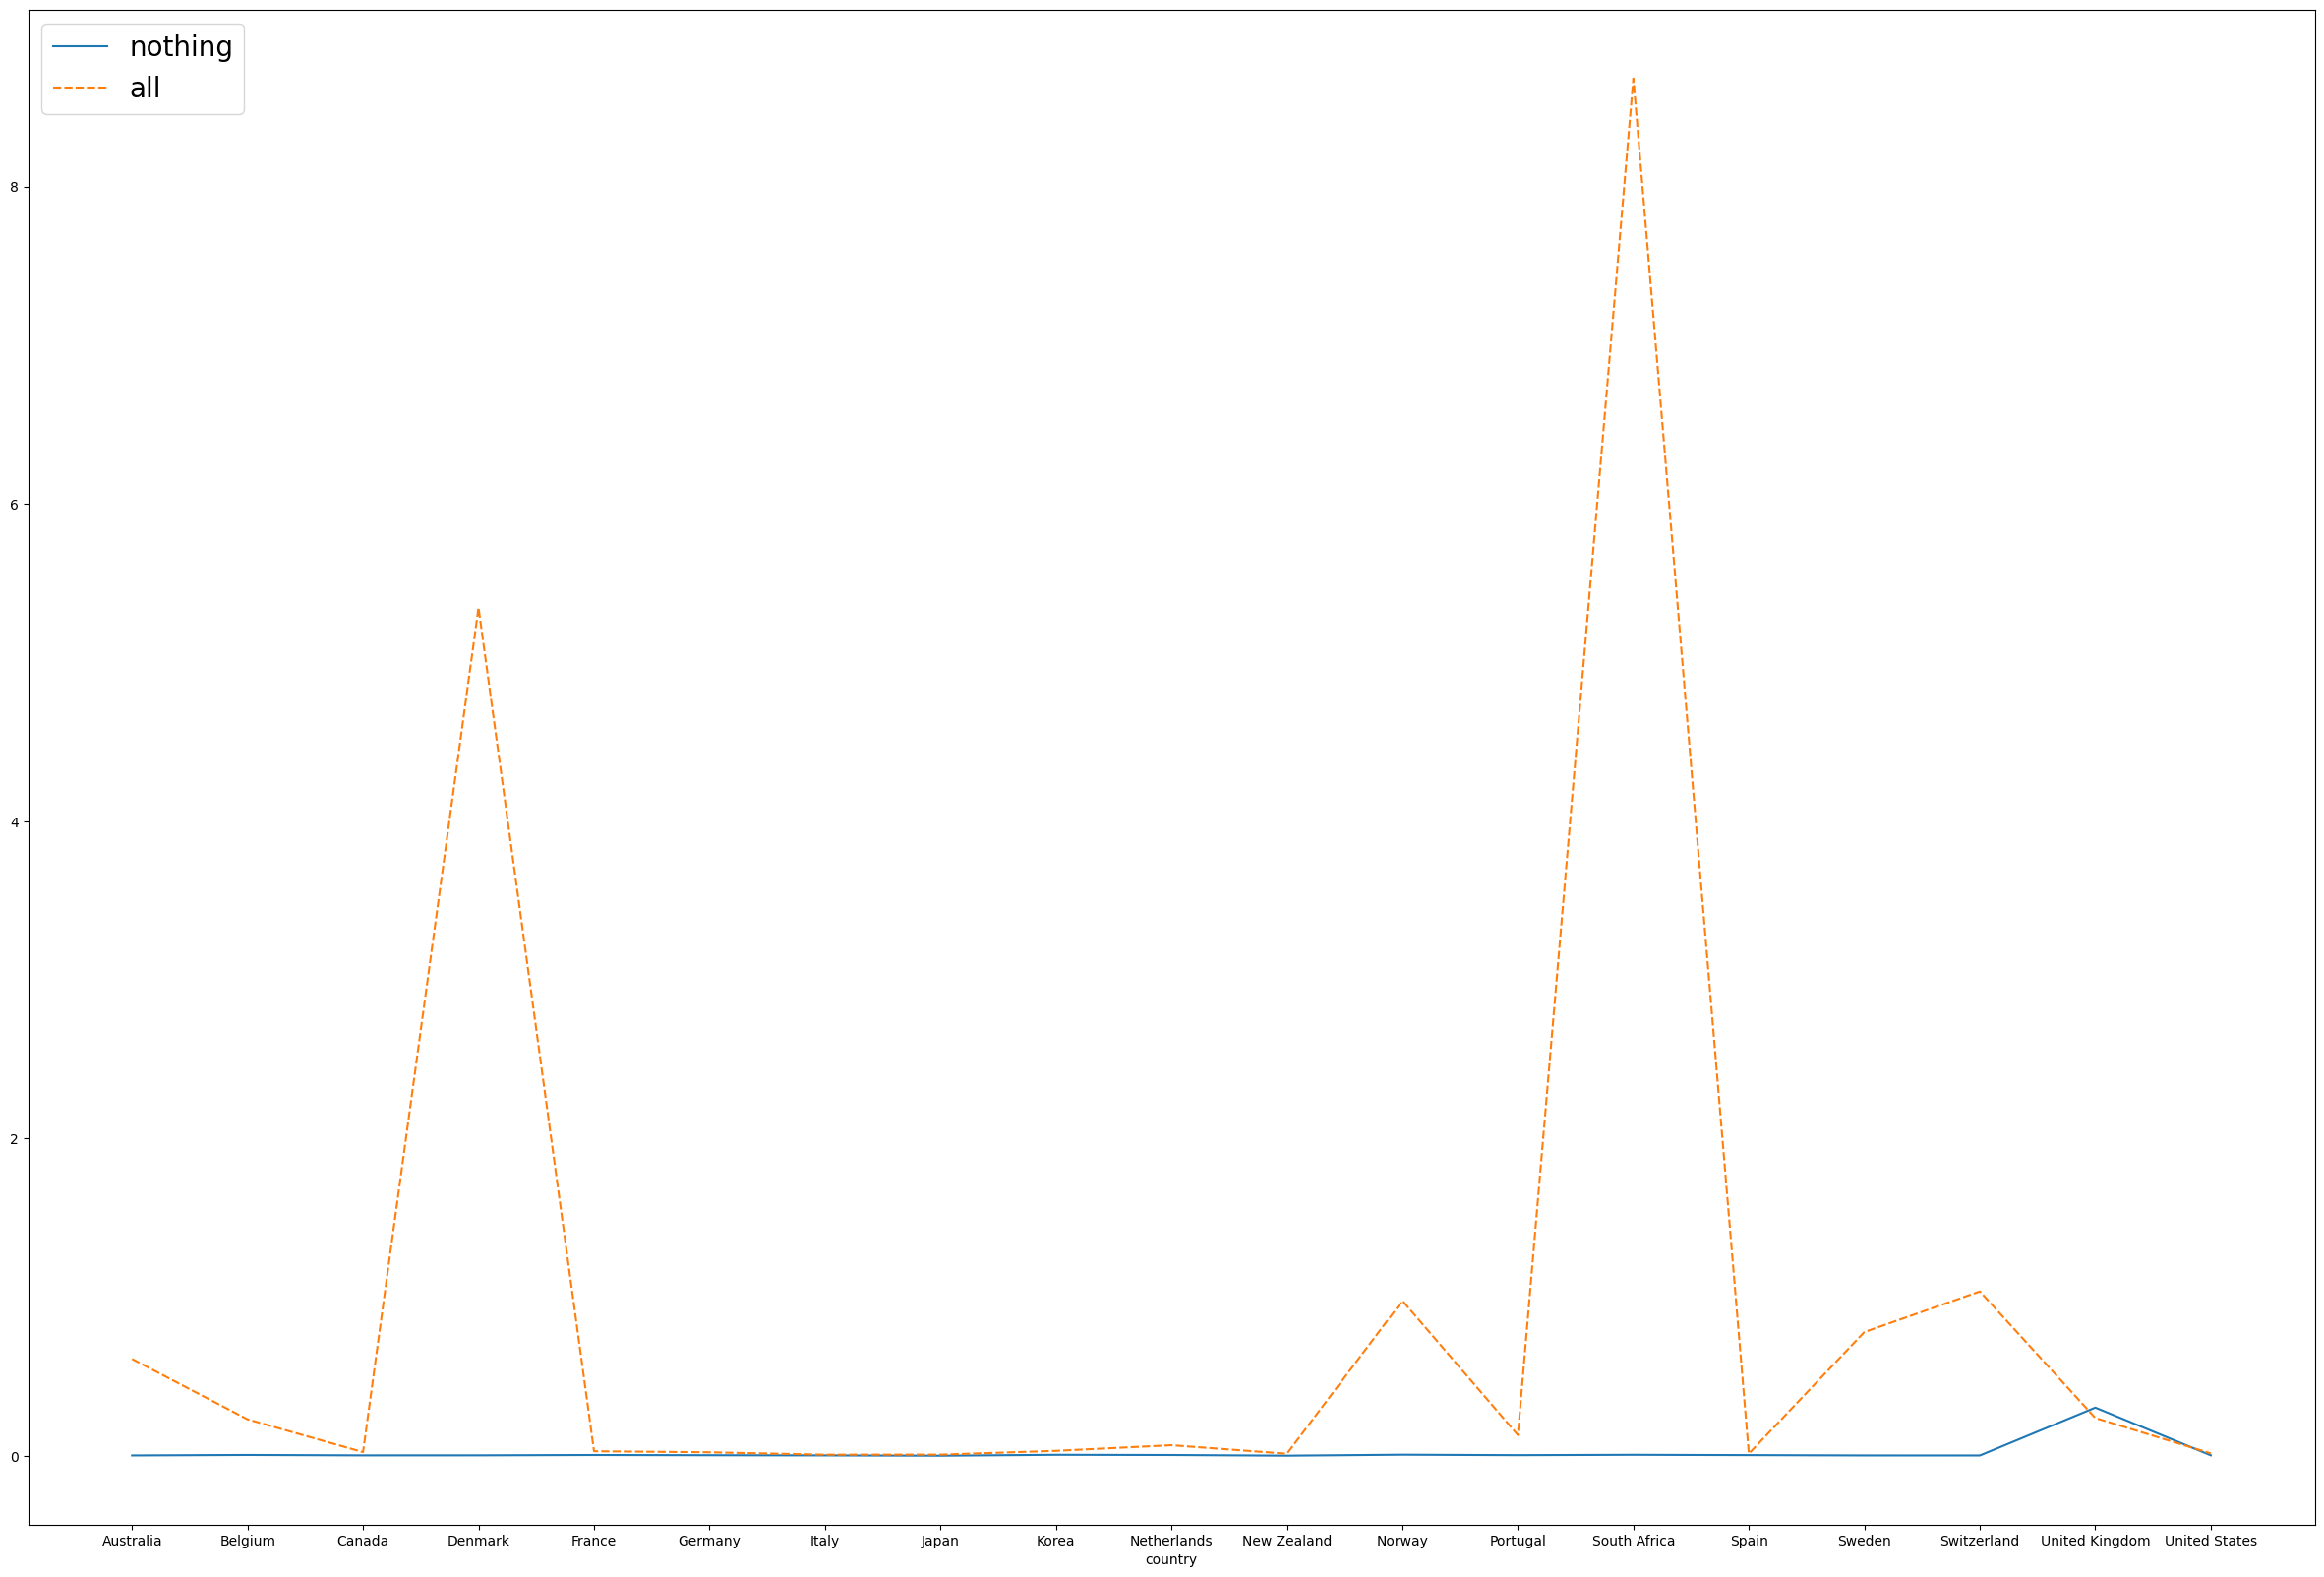

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.lineplot(
    data = stats2
)
plt.legend(loc = 'upper left', fontsize = "20")

In [48]:
stats2.mean()

nothing    0.021501
all        0.962741
dtype: float64